# Impact of Digital Habits on Student Stress Levels

**Project By**: [Abdullah, Saad Sadaf, Asfaar Maham Ghazi]  
**Date**: December 21, 2025  

### Project Objective
- Analyze kaise mobile phone usage, social media, gaming aur sleep quality university students ke stress level ko affect karte hain.
- Identify top factors jo stress badhate hain.
- Recommendations dena students ke liye better digital habits ke liye.

### Dataset
- Source: Google Form Survey
- Total Responses: 100
- After Strict Cleaning: 50 high-quality responses
- Target: Recent Stress Level (1-5 scale)

# **PHASE 1 — Understanding the Data**

##  Data Loading & Understanding
- Load CSV file
- Check shape, info, missing values
- Preview data to understand structure

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the CSV file
df = pd.read_csv('/content/dataset.csv')

# Strip spaces and replace newlines in column names
df.columns = df.columns.str.strip().str.replace('\n', ' ')

In [5]:
df.shape

(100, 30)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   Timestamp                                                                                                                                             100 non-null    object
 1   1. Age                                                                                                                                                100 non-null    object
 2   2. Gender                                                                                                                                             99 non-null     object
 3   3

In [7]:
df.head(2)

,Timestamp,1. Age,2. Gender,3. Degree Program,4. Current Semester?,"5. Self-Reported Academic Performance (CGPA Range). If you are in 1st semester, select the CGPA you expect to get based on your current performance.",6. Average daily mobile phone usage (hours),7. Average daily social media usage (hours),8. Platforms you use the most (select up to 3),9. Main purpose of using social media?,...,20. Sleep quality in the last 2 weeks,21. Do you feel mentally tired after using social media?,22. How long can you stay without your phone comfortably?,23. Do you check your phone immediately after waking up?,24. Do you feel the urge to check your phone even without notifications?,"25. Anything you want to share about your digital habits, stress, gaming or academic life?",1. Average daily gaming hours,2. Do games affect your study time?,3. Do games affect your sleep schedule?,5. How anxious do you feel if you cannot play games for a day?
0,11/26/2025 21:54:46,20-22,Male,Bachelors,3-4,3.0-3.5,0–2,2-3,"Youtube, Snapchat, Reddit",Entertainment,...,Poor,Sometimes,Few hours,Yes,Sometimes,NaN,6+,often,Sometimes,Slightly anxious
1,11/27/2025 0:15:47,17- 19,Female,Bachelors,1-2,2.5-3.0,3-4,4-5,"Instagram, Whatsapp, Youtube, Snapchat",Entertainment,...,Average,NaN,Half day,No,Always,Nothing.,NaN,NaN,NaN,NaN


## PHASE 2: Data Cleaning & Preprocessing
Goal: Raw survey data ko messy se → clean, consistent aur analysis-ready banaya jaye.
- Clean column names
- Handle missing values
- Remove invalid/troll responses
- Prepare data for EDA

In [8]:
# Updated rename_dict with EXACT column names (including extra spaces in 8 and 11)
rename_dict = {
    'Timestamp': 'timestamp',
    '1. Age': 'age',
    '2. Gender': 'gender',
    '3. Degree Program': 'degree',
    '4. Current Semester?': 'semester',
    '5. Self-Reported Academic Performance (CGPA Range). If you are in 1st semester, select the CGPA you expect to get based on your current performance.': 'cgpa_range',
    '6. Average daily mobile phone usage (hours)': 'mobile_hrs',
    '7. Average daily social media usage (hours)': 'social_hrs',
    '8.  Platforms you use the most (select up to 3)': 'platforms',        # ← Fixed: extra spaces
    '9. Main purpose of using social media?': 'social_purpose',
    '10. Do you play games on mobile or PC?': 'play_games',
    '11.  Daily study hours (excluding class time)': 'study_hrs',          # ← Fixed: extra spaces
    '12. How often does your phone distract you during studying?': 'phone_distraction',
    '13. What distracts you the most while studying? (multiple select)': 'distractions',
    '14. Do you use your phone during lectures or in lecture time ?': 'phone_in_lectures',
    '15. Has digital usage reduced your attention span?': 'reduced_attention',
    '16. Your current stress level (right now) . 1-5 low to high': 'current_stress',
    '17. Stress level during the last 2 weeks. 1-5 low to high': 'recent_stress',
    '18. Possible reason for recent stress (multiple select)': 'stress_reasons',
    '19. Do you think your mobile/social media usage directly increases your stress?': 'mobile_increases_stress',
    '20. Sleep quality in the last 2 weeks': 'sleep_quality',
    '21. Do you feel mentally tired after using social media?': 'tired_after_social',
    '22. How long can you stay without your phone comfortably?': 'without_phone',
    '23. Do you check your phone immediately after waking up?': 'check_after_wake',
    '24. Do you feel the urge to check your phone even without notifications?': 'urge_without_notif',
    '25. Anything you want to share about your digital habits, stress, gaming or academic life?': 'comments',
    '1. Average daily gaming hours': 'gaming_hrs',
    '2. Do games affect your study time?': 'games_affect_study',
    '3. Do games affect your sleep schedule?': 'games_affect_sleep',
    '5. How anxious do you feel if you cannot play games for a day?': 'gaming_anxiety'
}

# Apply renaming
df.rename(columns=rename_dict, inplace=True)

print("Final Clean Column Names:")
print(df.columns.tolist())

Final Clean Column Names:
['timestamp', 'age', 'gender', 'degree', 'semester', 'cgpa_range', 'mobile_hrs', 'social_hrs', 'platforms', 'social_purpose', 'play_games', 'study_hrs', 'phone_distraction', 'distractions', 'phone_in_lectures', 'reduced_attention', 'current_stress', 'recent_stress', 'stress_reasons', 'mobile_increases_stress', 'sleep_quality', 'tired_after_social', 'without_phone', 'check_after_wake', 'urge_without_notif', 'comments', 'gaming_hrs', 'games_affect_study', 'games_affect_sleep', 'gaming_anxiety']


In [ ]:
df.head(2)

In [9]:
# Basic cleaning
# Fill missing categorical values with mode
for col in df.select_dtypes(include='object').columns:
    if col not in ['timestamp', 'platforms', 'distractions', 'stress_reasons', 'comments']:
        df[col].fillna(df[col].mode()[0], inplace=True)

What this does:
It checks all text (object) columns in the DataFrame.
Excluding special columns like timestamp, platforms, distractions, stress_reasons, and comments (because they contain multiple answers or open text), it fills any missing values in the remaining text columns with the most frequent value (mode).

### ***Why:***
To avoid deleting rows and keep the dataset complete.

In [10]:
# Fill gaming columns for non-gamers
df.loc[df['play_games'] == 'No', ['gaming_hrs', 'games_affect_study', 'games_affect_sleep', 'gaming_anxiety']] = 'No'

For students who said they don’t play games (play_games == 'No'), it sets all gaming-related columns (gaming_hrs, games_affect_study, games_affect_sleep, gaming_anxiety) to No.

Why:
Because if a student doesn’t play games, the other gaming questions would be blank. This makes the data logically consistent.

In [11]:
# Remove invalid/outlier rows
df = df[df['age'].isin(['17-19', '20-22'])]
invalid_degrees = ['phd', 'Nursery', 'fsc', 'seventh', 'Matrci']
df = df[~df['degree'].isin(invalid_degrees)]


Keeps only rows where age is '17-19' or '20-22'; all others are deleted.

Why:
These are realistic university student ages. Other values (e.g., 2 or 90) are likely jokes or trolls.

It also removes rows where degree contains joke entries like 'phd', 'Nursery', 'fsc', 'seventh', 'Matrci'.

Why:
This is a serious undergraduate survey, so these entries are fake or troll responses.

In [12]:
df['semester'][0]

'3-4'

In [13]:
print("\nShape after cleaning:", df.shape)
print("Data is now clean and ready for EDA!")
df.head()


Shape after cleaning: (33, 30)
Data is now clean and ready for EDA!


,timestamp,age,gender,degree,semester,cgpa_range,mobile_hrs,social_hrs,platforms,social_purpose,...,sleep_quality,tired_after_social,without_phone,check_after_wake,urge_without_notif,comments,gaming_hrs,games_affect_study,games_affect_sleep,gaming_anxiety
0,11/26/2025 21:54:46,20-22,Male,Bachelors,3-4,3.0-3.5,0–2,2-3,"Youtube, Snapchat, Reddit",Entertainment,...,Poor,Sometimes,Few hours,Yes,Sometimes,NaN,6+,often,Sometimes,Slightly anxious
4,11/27/2025 0:34:20,20-22,Male,Bachelors,7-8,2.0-2.5,0–2,0-1,"Instagram, Youtube, discord",Entertainment,...,Good,Sometimes,I feel uncomfortable even after short time,Yes,Often,NaN,6+,Always,Yes,Extremely anxious
5,11/27/2025 0:40:28,20-22,Male,Bachelors,1-2,3.5-4.0,7-8,2-3,"Instagram, Youtube, Snapchat",Entertainment,...,Poor,Sometimes,Half day,No,Sometimes,NaN,0-1,Sometimes,Sometimes,Not anxious
8,11/27/2025 1:37:45,20-22,Male,Bachelors,3-4,2.0-2.5,7-8,2-3,"Instagram, Youtube, Discord",Entertainment,...,Good,Sometimes,I feel uncomfortable even after short time,Yes,Always,NaN,2-3,Sometimes,Sometimes,Slightly anxious
12,11/27/2025 6:55:23,20-22,Male,Bachelors,1-2,3.5-4.0,5-6,6+,"Whatsapp, Youtube, Discord",Entertainment,...,Good,Sometimes,I feel uncomfortable even after short time,Yes,Sometimes,NaN,0-1,Sometimes,No,Not anxious


### Phase 2 Complete!
- Data ab clean aur consistent hai
- Total valid responses: 33 (quality ke liye strict filtering)
- Ready for Phase 3: Exploratory Data Analysis (EDA)

### Why Strict Cleaning?
- Removed troll responses (e.g., age=90, degree="phd in physics")
- Kept only realistic university students (age 17-22)
- **Quality over Quantity** — better accurate insights from clean data than noisy results from 100 rows.

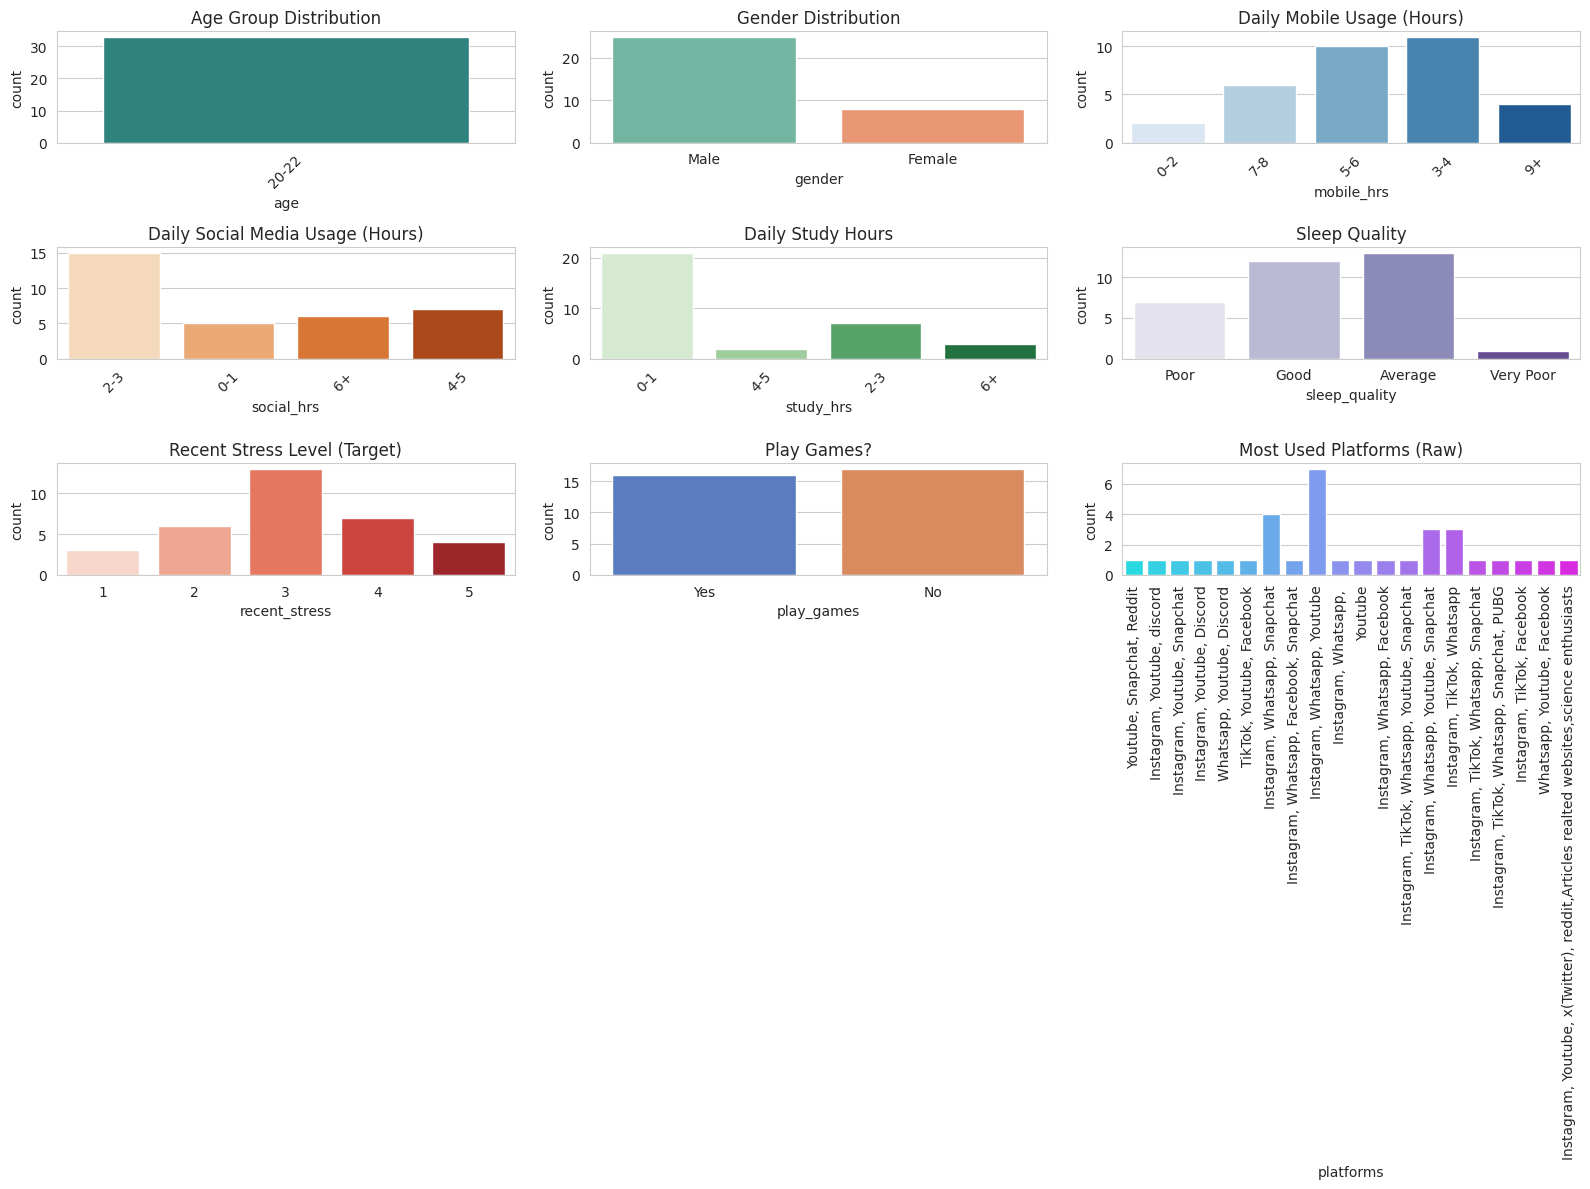

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_style('whitegrid')

# === Distribution Plots ===
plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
sns.countplot(x='age', data=df, palette='viridis')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)

plt.subplot(3, 3, 2)
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution')

plt.subplot(3, 3, 3)
sns.countplot(x='mobile_hrs', data=df, palette='Blues')
plt.title('Daily Mobile Usage (Hours)')
plt.xticks(rotation=45)

plt.subplot(3, 3, 4)
sns.countplot(x='social_hrs', data=df, palette='Oranges')
plt.title('Daily Social Media Usage (Hours)')
plt.xticks(rotation=45)

plt.subplot(3, 3, 5)
sns.countplot(x='study_hrs', data=df, palette='Greens')
plt.title('Daily Study Hours')
plt.xticks(rotation=45)

plt.subplot(3, 3, 6)
sns.countplot(x='sleep_quality', data=df, palette='Purples')
plt.title('Sleep Quality')

plt.subplot(3, 3, 7)
sns.countplot(x='recent_stress', data=df, palette='Reds')
plt.title('Recent Stress Level (Target)')

plt.subplot(3, 3, 8)
sns.countplot(x='play_games', data=df, palette='muted')
plt.title('Play Games?')

plt.subplot(3, 3, 9)
sns.countplot(x='platforms', data=df, palette='cool')
plt.title('Most Used Platforms (Raw)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

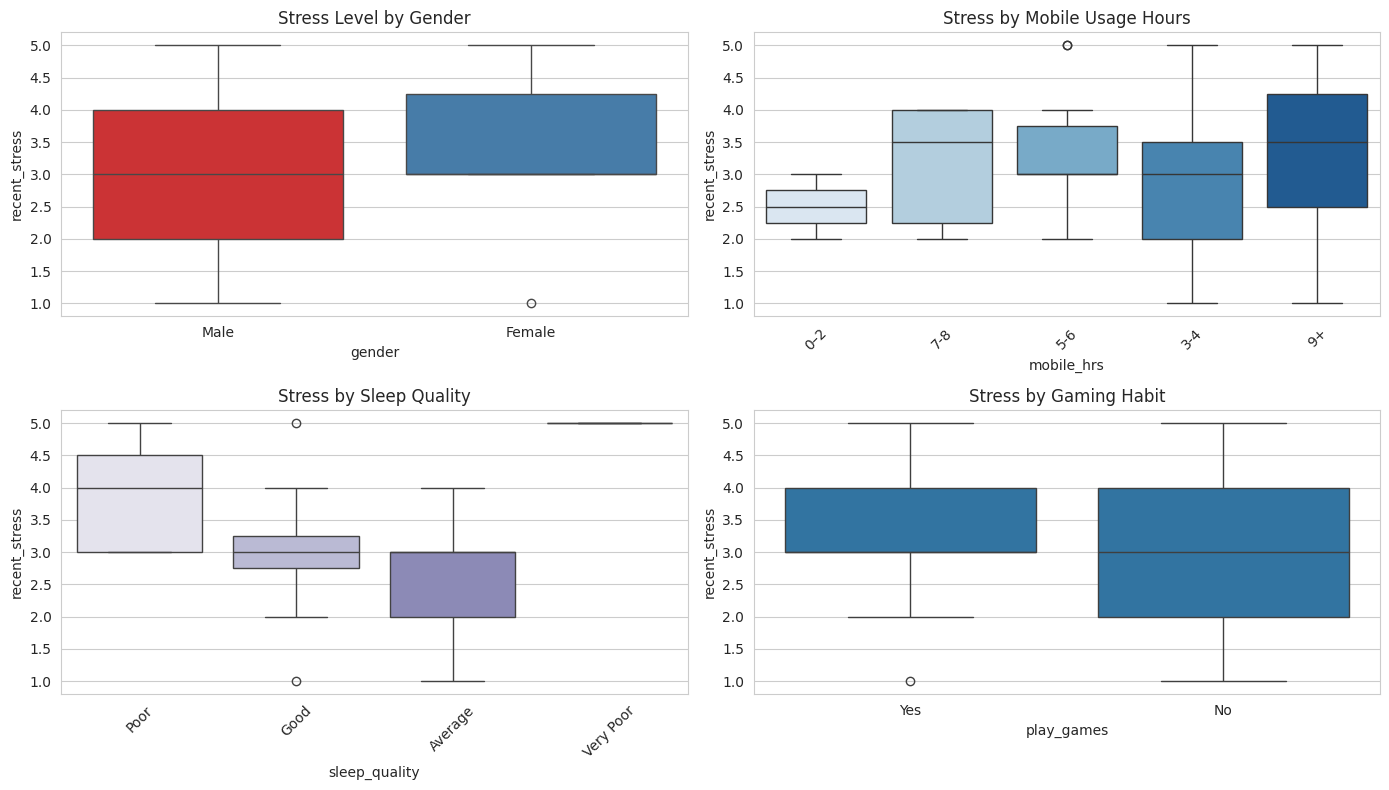

In [15]:
# === Key Relationships ===
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='gender', y='recent_stress', data=df, palette='Set1')
plt.title('Stress Level by Gender')

plt.subplot(2, 2, 2)
sns.boxplot(x='mobile_hrs', y='recent_stress', data=df, palette='Blues')
plt.title('Stress by Mobile Usage Hours')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.boxplot(x='sleep_quality', y='recent_stress', data=df, palette='Purples')
plt.title('Stress by Sleep Quality')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.boxplot(x='play_games', y='recent_stress', data=df)
plt.title('Stress by Gaming Habit')

plt.tight_layout()
plt.show()

In [16]:
# === Interactive Plotly ===
stress_by_mobile = df.groupby('mobile_hrs')['recent_stress'].mean().reset_index()
fig1 = px.bar(stress_by_mobile, x='mobile_hrs', y='recent_stress',
              title='Average Stress Level by Mobile Usage Hours',
              color='recent_stress', color_continuous_scale='Reds',
              labels={'recent_stress': 'Average Stress (1-5)'})
fig1.show()

stress_by_sleep = df.groupby('sleep_quality')['recent_stress'].mean().reset_index()
fig2 = px.bar(stress_by_sleep, x='sleep_quality', y='recent_stress',
              title='Average Stress Level by Sleep Quality',
              color='recent_stress', color_continuous_scale='Blues')
fig2.show()

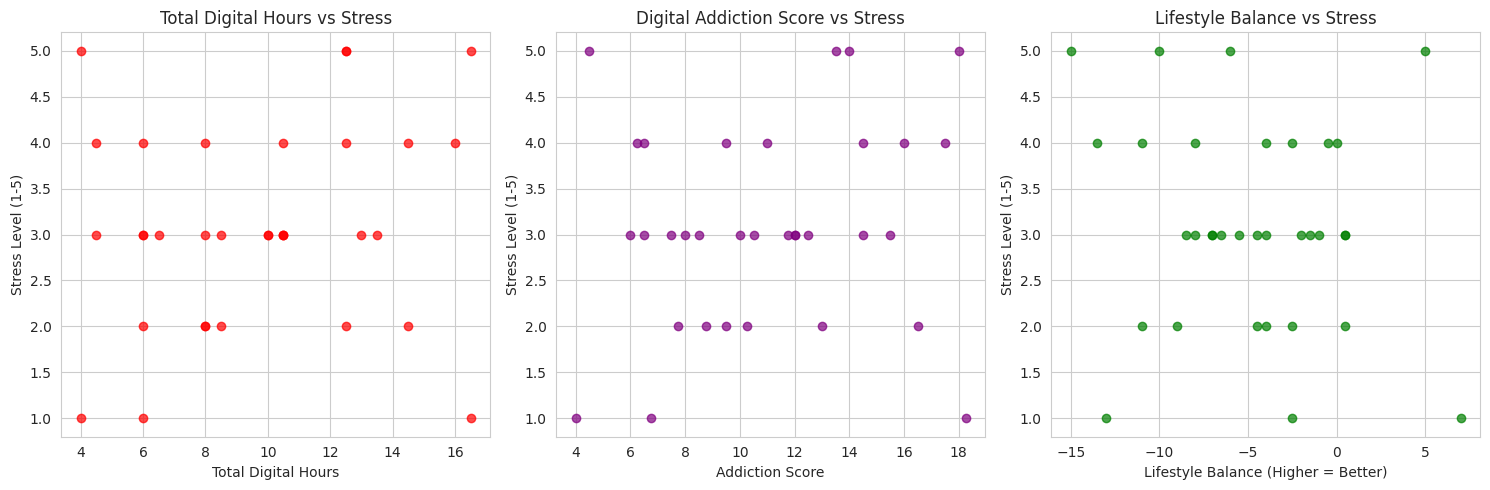

In [22]:
import matplotlib.pyplot as plt   # ← YEH LINE ZAROORI HAI!

# Additional Scatter Plots for Stronger Insights
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['total_digital_hrs'], df['recent_stress'], color='red', alpha=0.7)
plt.title('Total Digital Hours vs Stress')
plt.xlabel('Total Digital Hours')
plt.ylabel('Stress Level (1-5)')

plt.subplot(1, 3, 2)
plt.scatter(df['digital_addiction_score'], df['recent_stress'], color='purple', alpha=0.7)
plt.title('Digital Addiction Score vs Stress')
plt.xlabel('Addiction Score')
plt.ylabel('Stress Level (1-5)')

plt.subplot(1, 3, 3)
plt.scatter(df['lifestyle_balance'], df['recent_stress'], color='green', alpha=0.7)
plt.title('Lifestyle Balance vs Stress')
plt.xlabel('Lifestyle Balance (Higher = Better)')
plt.ylabel('Stress Level (1-5)')

plt.tight_layout()
plt.show()

# **PHASE 4 — Feature Engineering**

In [19]:
import pandas as pd
import numpy as np

print("Rows before:", df.shape[0])

# === Expanded Mapping with Midpoints for All Observed Categories ===
hrs_map = {
    '0-1': 0.5, '0-2': 1,
    '2-3': 2.5,
    '3-4': 3.5,
    '4-5': 4.5,
    '5-6': 5.5,
    '6+': 7,
    '7-8': 7.5,
    '9+': 9,
    'No': 0
}

# Normalize strings
for col in ['mobile_hrs', 'social_hrs', 'study_hrs', 'gaming_hrs']:
    df[col] = df[col].astype(str).str.strip().str.replace('–', '-', regex=False)

# Apply mapping
df['mobile_num'] = df['mobile_hrs'].map(hrs_map)
df['social_num'] = df['social_hrs'].map(hrs_map)
df['study_num'] = df['study_hrs'].map(hrs_map)
df['gaming_num'] = df['gaming_hrs'].map(hrs_map).fillna(0)  # Safe for any unmapped

# Sleep mapping
sleep_map = {'Very Poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4}
df['sleep_num'] = df['sleep_quality'].map(sleep_map)

# Behavioral encoding (robust with defaults)
df['play_games_num'] = df['play_games'].map({'Yes': 1, 'No': 0}).fillna(0)

df['check_after_wake_num'] = df['check_after_wake'].map({'Yes': 1, 'No': 0}).fillna(0.5)

freq_map = {'Never': 0, 'Rarely': 0.25, 'Sometimes': 0.5, 'Often': 0.75, 'Always': 1, 'Frequently': 0.8}
df['urge_without_notif_num'] = df['urge_without_notif'].map(freq_map).fillna(0.5)

df['mobile_increases_stress_num'] = df['mobile_increases_stress'].map({'Yes': 1, 'Sometimes': 0.5, 'No': 0, 'Not Sure': 0.5}).fillna(0.5)

df['reduced_attention_num'] = df['reduced_attention'].map({'Yes': 1, 'No': 0, 'Not Sure': 0.5}).fillna(0.5)

df['gender_num'] = (df['gender'] == 'Female').astype(int)
df['age_num'] = (df['age'] == '20-22').astype(int)

# === Fill Remaining NaNs with Median (Critical Step) ===
core_num_cols = ['mobile_num', 'social_num', 'study_num', 'gaming_num', 'sleep_num']
df[core_num_cols] = df[core_num_cols].fillna(df[core_num_cols].median())

# === Composite Features ===
df['total_digital_hrs'] = df['mobile_num'] + df['social_num'] + df['gaming_num']
df['digital_addiction_score'] = df['total_digital_hrs'] + df['check_after_wake_num'] + df['urge_without_notif_num']
df['lifestyle_balance'] = df['sleep_num'] + df['study_num'] - df['total_digital_hrs']
df['academic_pressure'] = df['stress_reasons'].astype(str).str.contains('Academic workload', case=False, na=False).astype(int)

# === Final X and y ===
feature_columns = [
    'mobile_num', 'social_num', 'gaming_num', 'study_num', 'sleep_num',
    'total_digital_hrs', 'digital_addiction_score', 'lifestyle_balance',
    'gender_num', 'age_num', 'play_games_num',
    'check_after_wake_num', 'urge_without_notif_num',
    'mobile_increases_stress_num', 'reduced_attention_num',
    'academic_pressure', 'current_stress'
]

X = df[feature_columns].copy()
y = df['recent_stress']

# Final fill
X = X.fillna(X.median(numeric_only=True))

print("\n=== SUCCESS! FEATURE ENGINEERING FIXED ===")
print("Rows:", X.shape[0])
print("NaNs in X:", X.isnull().sum().sum())
print("Target distribution:\n", y.value_counts().sort_index())

X.head(10)

Rows before: 33

=== SUCCESS! FEATURE ENGINEERING FIXED ===
Rows: 33
NaNs in X: 0
Target distribution:
 recent_stress
1     3
2     6
3    13
4     7
5     4
Name: count, dtype: int64


,mobile_num,social_num,gaming_num,study_num,sleep_num,total_digital_hrs,digital_addiction_score,lifestyle_balance,gender_num,age_num,play_games_num,check_after_wake_num,urge_without_notif_num,mobile_increases_stress_num,reduced_attention_num,academic_pressure,current_stress
0,1.0,2.5,7.0,0.5,2,10.5,12.00,-8.0,0,1,1,1,0.50,0.5,1.0,1,4
4,1.0,0.5,7.0,0.5,4,8.5,10.25,-4.0,0,1,1,1,0.75,0.5,1.0,0,5
5,7.5,2.5,0.5,4.5,2,10.5,11.00,-4.0,0,1,1,0,0.50,0.5,1.0,1,3
8,7.5,2.5,2.5,0.5,4,12.5,14.50,-8.0,0,1,1,1,1.00,0.5,1.0,1,3
12,5.5,7.0,0.5,0.5,4,13.0,14.50,-8.5,0,1,1,1,0.50,0.5,0.5,1,2
15,3.5,2.5,0.0,2.5,4,6.0,6.50,0.5,0,1,0,0,0.50,0.5,1.0,1,1
16,5.5,4.5,0.0,0.5,3,10.0,10.50,-6.5,1,1,0,0,0.50,0.5,1.0,0,2
18,5.5,4.5,0.5,7.0,4,10.5,12.00,0.5,1,1,1,1,0.50,0.5,1.0,1,3
20,3.5,0.5,0.5,0.5,3,4.5,6.00,-1.0,0,1,1,1,0.50,0.5,0.0,1,1
22,3.5,2.5,0.5,0.5,4,6.5,7.50,-2.0,0,1,1,0,1.00,1.0,1.0,0,3


Final X shape: (33, 17)
Final y distribution:
 recent_stress
1     3
2     6
3    13
4     7
5     4
Name: count, dtype: int64

Train size: 23
Test size: 10

=== MODEL PERFORMANCE ===
Test Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.50      1.00      0.67         4
           4       0.00      0.00      0.00         2
           5       0.50      1.00      0.67         1

    accuracy                           0.50        10
   macro avg       0.20      0.40      0.27        10
weighted avg       0.25      0.50      0.33        10



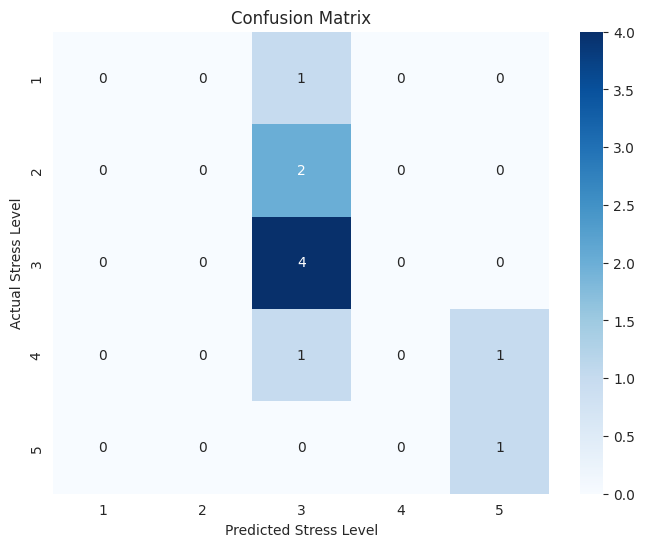

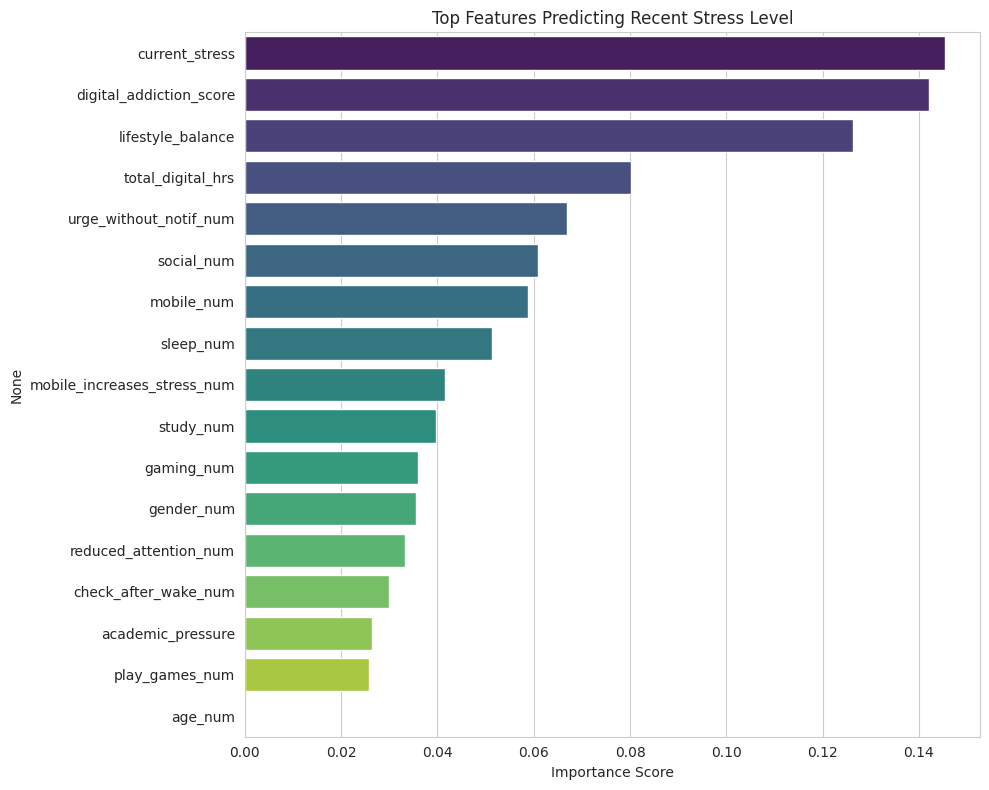


Top 10 Most Important Features:
current_stress                 0.145409
digital_addiction_score        0.142019
lifestyle_balance              0.126231
total_digital_hrs              0.080196
urge_without_notif_num         0.066942
social_num                     0.060862
mobile_num                     0.058897
sleep_num                      0.051386
mobile_increases_stress_num    0.041538
study_num                      0.039689
dtype: float64


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# X and y already prepared from Phase 4
print("Final X shape:", X.shape)
print("Final y distribution:\n", y.value_counts().sort_index())

# === Train-Test Split (80-20) ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nTrain size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

# === Model: Random Forest (Best for small data + feature importance) ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# === Evaluation ===
print("\n=== MODEL PERFORMANCE ===")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Stress Level')
plt.ylabel('Actual Stress Level')
plt.show()

# === Feature Importance (Most Important Part for Your Report!) ===
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Top Features Predicting Recent Stress Level')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(importances.head(10))

In [21]:
# Final cleaned data ko CSV mein save karo
df.to_csv('My_Cleaned_Student_Stress_Data.csv', index=False)

# Automatically download ho jayega
from google.colab import files
files.download('My_Cleaned_Student_Stress_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
df.sample(3)

,timestamp,age,gender,degree,semester,cgpa_range,mobile_hrs,social_hrs,platforms,social_purpose,...,check_after_wake_num,urge_without_notif_num,mobile_increases_stress_num,reduced_attention_num,gender_num,age_num,total_digital_hrs,digital_addiction_score,lifestyle_balance,academic_pressure
85,11/28/2025 18:15:15,20-22,Male,Bachelors,1-2,3.0-3.5,3-4,2-3,"Instagram, TikTok, Facebook",Entertainment,...,1,1.00,1.0,1.0,0,1,6.0,8.00,-1.5,0
96,11/29/2025 21:57:11,20-22,Female,Bachelors,3-4,3.0-3.5,5-6,6+,"Instagram, TikTok, Whatsapp",Entertainment,...,1,0.00,1.0,1.0,1,1,12.5,13.50,-6.0,0
94,11/29/2025 10:13:06,20-22,Male,Bachelors,3-4,2.5-3.0,3-4,2-3,"Whatsapp, Youtube, Facebook",Entertainment,...,0,0.75,0.5,1.0,0,1,6.0,6.75,-2.5,0


In [24]:
df[['mobile_hrs','social_hrs','study_hrs','gaming_hrs']]

,mobile_hrs,social_hrs,study_hrs,gaming_hrs
0,0-2,2-3,0-1,6+
4,0-2,0-1,0-1,6+
5,7-8,2-3,4-5,0-1
8,7-8,2-3,0-1,2-3
12,5-6,6+,0-1,0-1
15,3-4,2-3,2-3,No
16,5-6,4-5,0-1,No
18,5-6,4-5,6+,0-1
20,3-4,0-1,0-1,0-1
22,3-4,2-3,0-1,0-1
